In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import math
from object_detection import yolo_license
from PIL import Image
import easyocr

%matplotlib inline

Using CPU. Note: This module is much faster with a GPU.
Using CPU. Note: This module is much faster with a GPU.


Shape of image: (360, 480, 3)
 0.087274 seconds
[]
Shape of image: (66, 204, 3)
 0.102952 seconds


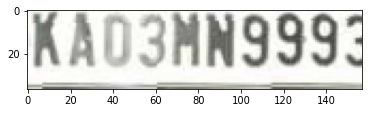

Using CPU. Note: This module is much faster with a GPU.


['Ka03nn9993']
Shape of image: (268, 500, 3)
 0.069684 seconds


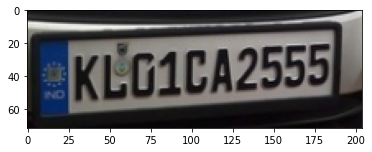

Using CPU. Note: This module is much faster with a GPU.


["'KLo1CA2555L"]
Shape of image: (300, 500, 3)
 0.107823 seconds


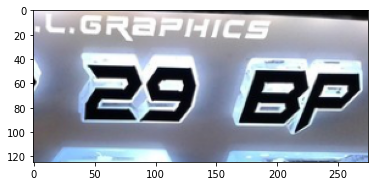

["'29 BP"]


In [40]:
def recognize_text_license_plate(imagePath, display=True, gpu=False, languages=['en']):
    reader = easyocr.Reader(languages, gpu=gpu)
    image = np.array(Image.open(imagePath), np.uint8)
    w, h, d = image.shape
    print("Shape of image:", image.shape)
    div1 = w // 32
    div2 = h // 32
    w = int(32 * div1)
    h = int(32 * div2)
    image = cv2.resize(image, (h, w))
    outputs = yolo_license(image)
    
    texts = []
    x, y, w, h = w, h, 0, 0
    for o in outputs:
        x_, y_, w_, h_ = o
        x = min(x, x_)
        y = min(y, y_)
        w = max(x+w, x+w_)
        h = max(y+h, y+h_)
    
    temp = image[y: h, x: w]
    if display and temp.any():
        plt.imshow(temp)
        plt.show()
        plt.imsave("temp-license.png", temp)
        results = reader.recognize("temp-license.png", paragraph=True, detail=0)
        total_text = "".join(results)

        texts.append(total_text)
        return texts
    return []

TEST_IMAGE_DIR = "./test2/"
THRESHOLD=0.25

for file in os.listdir(TEST_IMAGE_DIR):
    text = recognize_text_license_plate(TEST_IMAGE_DIR + file, display=True)
    print(text)